In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation = 'relu')(input_img)
decoded = Dense(784,  activation = 'sigmoid')(encoded)
autoencoder = Model(input_img,  decoded)

Creating separate encoder and decoder model

In [0]:
encoder = Model(input_img, encoded)

In [0]:
encoded_input = Input(shape =(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer = 'adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np

In [0]:
(x_train, _), (x_test,_) = mnist.load_data()

In [14]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [21]:
autoencoder.fit(x_train, x_train, epochs= 30, batch_size = 256, shuffle = True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.1670 - val_loss: 0.1635
Epoch 2/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.1629 - val_loss: 0.1596
Epoch 3/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.1591 - val_loss: 0.1559
Epoch 4/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.1556 - val_loss: 0.1526
Epoch 5/30
 1024/60000 [..............................] - ETA: 5s - loss: 0.1541

60000/60000 [==============================] - 6s 93us/step - loss: 0.1523 - val_loss: 0.1494
Epoch 6/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.1493 - val_loss: 0.1466
Epoch 7/30
60000/60000 [==============================] - 6s 92us/step - loss: 0.1465 - val_loss: 0.1438
Epoch 8/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.1440 - val_loss: 0.1414
Epoch 9/30
29952/60000 [=============>................] - ETA: 2s - loss: 0.1425

60000/60000 [==============================] - 6s 99us/step - loss: 0.1417 - val_loss: 0.1391
Epoch 10/30
60000/60000 [==============================] - 6s 97us/step - loss: 0.1395 - val_loss: 0.1370
Epoch 11/30
60000/60000 [==============================] - 6s 99us/step - loss: 0.1375 - val_loss: 0.1351
Epoch 12/30
60000/60000 [==============================] - 6s 99us/step - loss: 0.1356 - val_loss: 0.1332
Epoch 13/30
32768/60000 [===============>..............] - ETA: 2s - loss: 0.1340

60000/60000 [==============================] - 6s 96us/step - loss: 0.1338 - val_loss: 0.1313
Epoch 14/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.1320 - val_loss: 0.1296
Epoch 15/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.1303 - val_loss: 0.1280
Epoch 16/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.1287 - val_loss: 0.1263
Epoch 17/30
35072/60000 [================>.............] - ETA: 2s - loss: 0.1272

60000/60000 [==============================] - 6s 96us/step - loss: 0.1271 - val_loss: 0.1248
Epoch 18/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.1255 - val_loss: 0.1232
Epoch 19/30
60000/60000 [==============================] - 6s 92us/step - loss: 0.1241 - val_loss: 0.1218
Epoch 20/30
60000/60000 [==============================] - 6s 92us/step - loss: 0.1227 - val_loss: 0.1205
Epoch 21/30
36608/60000 [=================>............] - ETA: 2s - loss: 0.1217

60000/60000 [==============================] - 6s 94us/step - loss: 0.1214 - val_loss: 0.1193
Epoch 22/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.1201 - val_loss: 0.1180
Epoch 23/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.1189 - val_loss: 0.1168
Epoch 24/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.1178 - val_loss: 0.1157
Epoch 25/30
36864/60000 [=================>............] - ETA: 2s - loss: 0.1170

60000/60000 [==============================] - 6s 95us/step - loss: 0.1168 - val_loss: 0.1147
Epoch 26/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.1158 - val_loss: 0.1138
Epoch 27/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.1149 - val_loss: 0.1129
Epoch 28/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.1141 - val_loss: 0.1121
Epoch 29/30
36608/60000 [=================>............] - ETA: 2s - loss: 0.1134

60000/60000 [==============================] - 5s 91us/step - loss: 0.1133 - val_loss: 0.1113
Epoch 30/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.1125 - val_loss: 0.1106


In [0]:
decoded_imgs = autoencoder.predict(x_test)

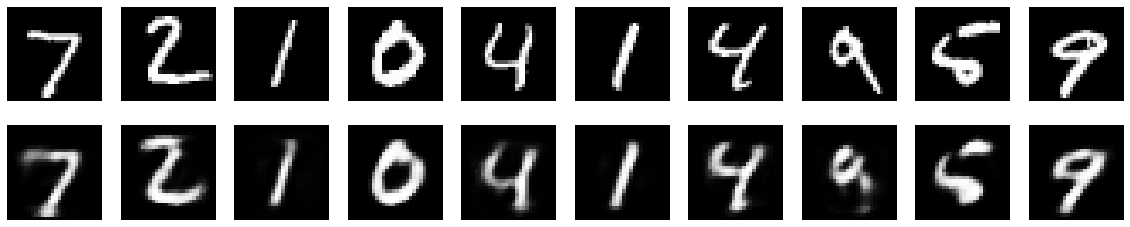

In [23]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()